<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [34]:
import pandas as pd

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [35]:
df = pd.read_csv('C:\\Users\\samsung\\Downloads\\Exercicio\\dados\\HousePrices_HalfMil.csv', sep = ';')

## Visualizar os dados

In [36]:
df.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Verificando o tamanho do dataset

In [37]:
df.shape

(1000, 7)

## Verificando dados nulos

In [38]:
df.isnull().sum()

precos       0
area         0
garagem      0
banheiros    0
lareira      0
marmore      0
andares      0
dtype: int64

## Verificando os tipos dos dados

In [39]:
df.dtypes

precos       int64
area         int64
garagem      int64
banheiros    int64
lareira      int64
marmore      int64
andares      int64
dtype: object

In [40]:
df.describe()

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41985.600000,124.326000,2.009000,3.000000,2.034000,0.331000,0.485000
std,12140.385408,72.389972,0.813376,1.429701,1.418752,0.470809,0.500025
min,13150.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,33112.500000,60.750000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,41725.000000,123.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,51175.000000,187.000000,3.000000,4.000000,3.000000,1.000000,1.000000
max,73675.000000,249.000000,3.000000,5.000000,4.000000,1.000000,1.000000


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [41]:
df.corr().round(3)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.000,0.118,0.103,0.124,0.107,0.431,0.632
area,0.118,1.000,-0.008,-0.011,0.012,-0.015,-0.018
garagem,0.103,-0.008,1.000,0.067,0.060,-0.016,-0.021
banheiros,0.124,-0.011,0.067,1.000,0.048,-0.025,-0.018
lareira,0.107,0.012,0.060,0.048,1.000,0.030,-0.004
marmore,0.431,-0.015,-0.016,-0.025,0.030,1.000,-0.007
andares,0.632,-0.018,-0.021,-0.018,-0.004,-0.007,1.000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Importando biblioteca seaborn

In [42]:
import seaborn as sns

## Configure o estilo e cor dos gráficos (opcional)

In [43]:
sns.set_palette('tab10')

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

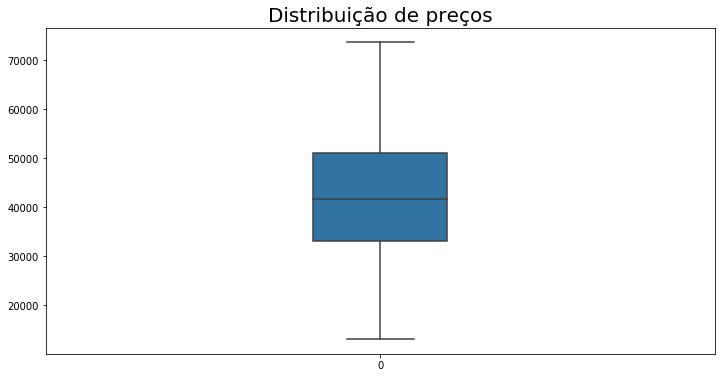

In [44]:
ax = sns.boxplot(data = df.precos, width = 0.2)
ax.set_title('Distribuição de preços',fontsize = 20)
ax.figure.set_size_inches(12,6)

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

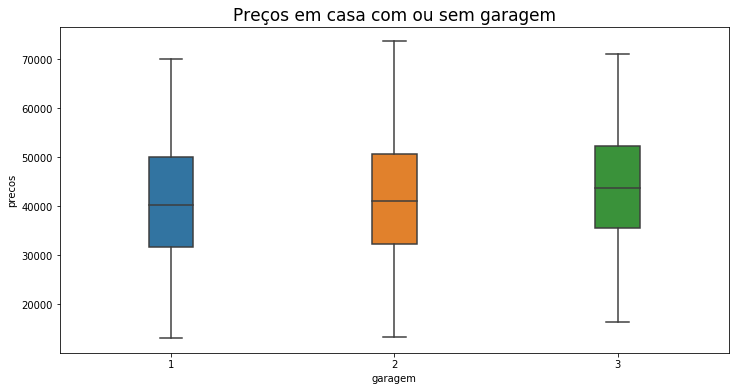

In [45]:
ax = sns.boxplot(data = df, width = 0.2, y = 'precos',x = 'garagem')
ax.set_title('Preços em casa com ou sem garagem',fontsize = 17)
ax.figure.set_size_inches(12,6)

### Box-plot (Preço X Banheiros)

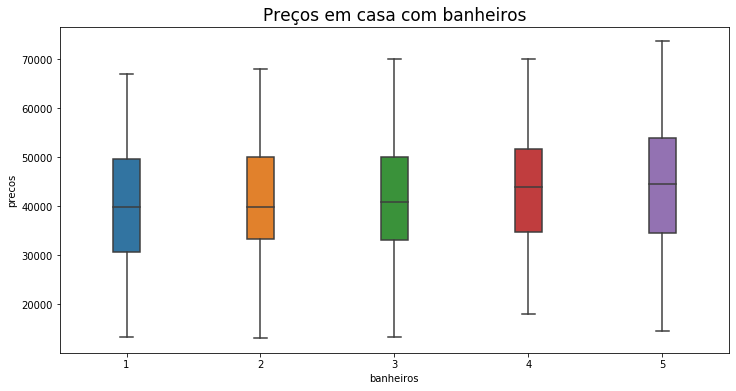

In [46]:
ax = sns.boxplot(data = df, width = 0.2, y = 'precos',x = 'banheiros')
ax.set_title('Preços em casa com banheiros',fontsize = 17)
ax.figure.set_size_inches(12,6)

### Box-plot (Preço X Lareira)

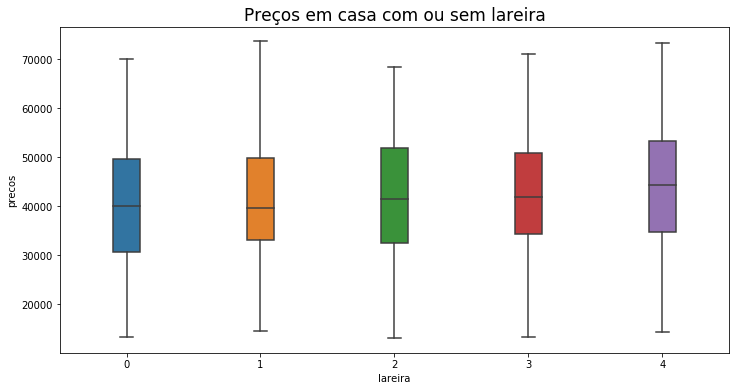

In [47]:
ax = sns.boxplot(data = df, width = 0.2, y = 'precos',x = 'lareira')
ax.set_title('Preços em casa com ou sem lareira',fontsize = 17)
ax.figure.set_size_inches(12,6)

### Box-plot (Preço X Acabamento em Mármore)

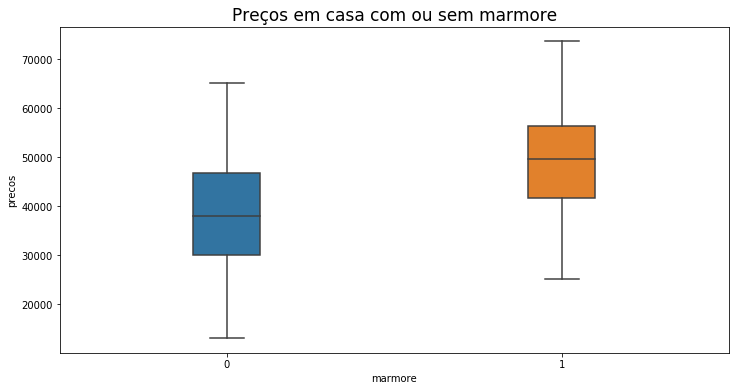

In [48]:
ax = sns.boxplot(data = df, width = 0.2, y = 'precos',x = 'marmore')
ax.set_title('Preços em casa com ou sem marmore',fontsize = 17)
ax.figure.set_size_inches(12,6)

### Box-plot (Preço X Andares)

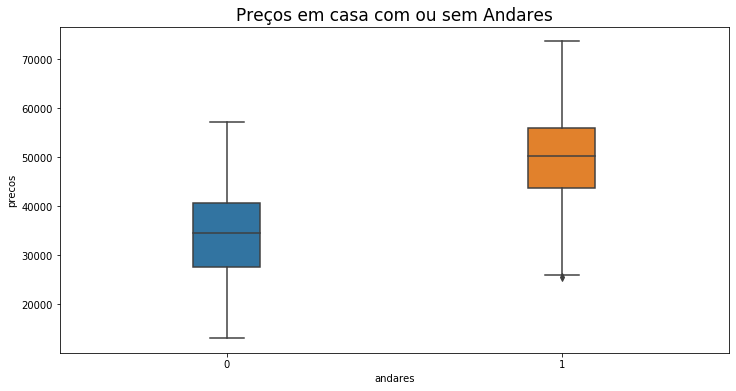

In [49]:
ax = sns.boxplot(data = df, width = 0.2, y = 'precos',x = 'andares')
ax.set_title('Preços em casa com ou sem Andares',fontsize = 17)
ax.figure.set_size_inches(12,6)

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

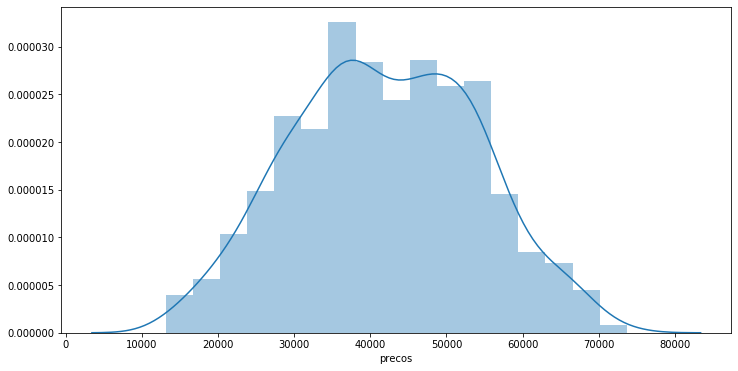

In [50]:
ax = sns.distplot(df.precos)
ax.figure.set_size_inches(12,6)

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

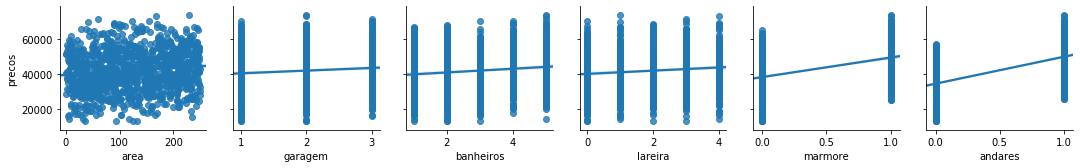

In [51]:
ax = sns.pairplot(df, y_vars = 'precos', x_vars = df.columns[1:],kind = 'reg')

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [52]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [53]:
y = df.precos

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [54]:
x_all = df.iloc[:,1:]
x_selected = df[['marmore','andares']]

## Criando os datasets de treino e de teste

In [55]:
x_train_all,x_test_all,y_train_all,y_test_all = train_test_split(x_all,y,test_size = 0.3)
x_train,x_test,y_train,y_test = train_test_split(x_selected,y,test_size = 0.3)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [57]:
modelo_all = LinearRegression()
modelo = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [58]:
modelo_all.fit(x_train_all,y_train_all)
modelo.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

In [59]:
print('juste marmore e garagem = {}'.format(modelo.score(x_train,y_train).round(3)))
print('ajuste todas as colunas  = {}'.format(modelo_all.score(x_train_all,y_train_all).round(3)))

juste marmore e garagem = 0.581
ajuste todas as colunas  = 0.655


## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [61]:
y_pred = modelo.predict(x_test)
y_pred_all = modelo_all.predict(x_test_all)

from sklearn.metrics import r2_score

print('R2 todas as colunas = {}'.format(r2_score(y_test_all, y_pred_all)))
print('R2 marmore e garagem = {}'.format(r2_score(y_test, y_pred)))

R2 todas as colunas = 0.6269682067363251
R2 marmore e garagem = 0.5982224757612795


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo métricas para o modelo com Temperatura Máxima

In [62]:
import numpy as np

EQM2 = metrics.mean_squared_error(y_test,y_pred).round(2)
REQM2 = np.sqrt(metrics.mean_squared_error(y_test,y_pred)).round(2)
r2_mod2 = metrics.r2_score(y_pred,y_test).round(2)

pd.DataFrame([EQM2,REQM2,r2_mod2],['EQM','REQM','R2'], columns =['Métricas'])

,Métricas
EQM,64268880.76
REQM,8016.79
R2,0.18


In [63]:
EQM2 = metrics.mean_squared_error(y_test_all,y_pred_all).round(2)
REQM2 = np.sqrt(metrics.mean_squared_error(y_test_all,y_pred_all)).round(2)
r2_mod2 = metrics.r2_score(y_pred_all,y_test_all).round(2)

pd.DataFrame([EQM2,REQM2,r2_mod2],['EQM','REQM','R2'], columns =['Métricas'])

,Métricas
EQM,51244790.33
REQM,7158.55
R2,0.49


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

In [64]:
import pickle

## Salvando o modelo estimado

In [66]:
output = open('modelo_alura_house_prices','wb')
pickle.dump(modelo,output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```